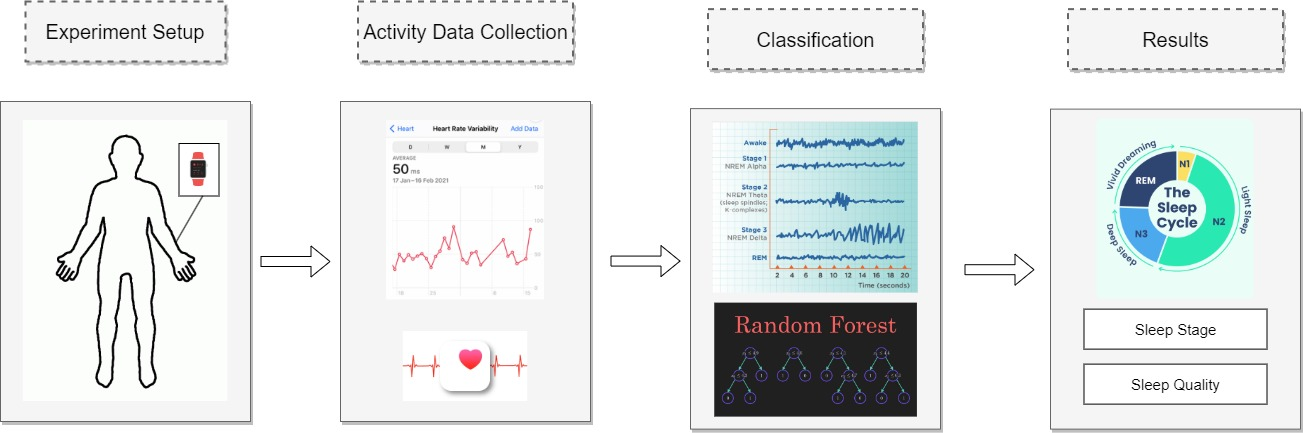

In [369]:
# !pip install scikit-fuzzy

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import skfuzzy as fuzz

In [371]:
# Baca file CSV heart rate data
heart_rate_data = pd.read_csv("https://raw.githubusercontent.com/edward-billy/heart-rate/main/heart_rate_data.csv")

# Baca file CSV sleep data
sleep_data = pd.read_csv("https://raw.githubusercontent.com/edward-billy/heart-rate/main/sleep_data.csv")

In [372]:
# Menyembunyikan warning
warnings.filterwarnings('ignore')

# Konversi kolom 'Timestamp' pada heart rate data menjadi format datetime
heart_rate_data['Timestamp'] = pd.to_datetime(heart_rate_data['Timestamp'])

# Konversi kolom 'Start Time' dan 'End Time' pada sleep data menjadi format datetime
sleep_data['Start Time'] = pd.to_datetime(sleep_data['Start Time'])
sleep_data['End Time'] = pd.to_datetime(sleep_data['End Time'])

# Filter sleep data untuk mendapatkan tanggal tidur pada bulan Januari 2023
# filtered_sleep_data = sleep_data[(sleep_data['Start Time'].dt.month == 1) & (sleep_data['Start Time'].dt.year == 2023)]

# filtered_sleep_data = sleep_data[sleep_data['Start Time'].dt.date >= pd.to_datetime('2023-04-18').date()]

filtered_sleep_data = sleep_data.copy()

# Drop kolom 'Source Name' dari heart rate data
heart_rate_data.drop('Source Name', axis=1, inplace=True)

# Buat list untuk menyimpan dataframe hasil filter per hari
filtered_heart_rate_data_per_day = []

# Loop melalui setiap baris dalam filtered sleep data
for index, row in filtered_sleep_data.iterrows():
    start_time = row['Start Time']
    end_time = row['End Time']
    category = row['Category']

    # Filter heart rate data berdasarkan waktu tidur per hari
    filtered_data = heart_rate_data[(heart_rate_data['Timestamp'] >= start_time) & (heart_rate_data['Timestamp'] <= end_time)]
    filtered_data['Category'] = category  # Tambahkan kolom 'Category' dari sleep data

    # Pisahkan kolom 'Timestamp' menjadi 'Date' dan 'Time'
    filtered_data['Date'] = filtered_data['Timestamp'].dt.date
    filtered_data['Time'] = filtered_data['Timestamp'].dt.time

    # Tambahkan dataframe hasil filter ke dalam list
    filtered_heart_rate_data_per_day.append(filtered_data)

# Gabungkan semua dataframe menjadi satu dataframe tunggal
filtered_heart_rate_data = pd.concat(filtered_heart_rate_data_per_day)

# Drop kolom Timestamp
filtered_heart_rate_data.drop('Timestamp', axis=1, inplace=True)

# Mengembalikan filter warning ke pengaturan aslinya
warnings.filterwarnings('default')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [373]:
filtered_heart_rate_data.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Heart Rate,Category,Date,Time
9,64.0000,Light/Core,2022-09-13,01:49:41
10,62.0000,Light/Core,2022-09-13,01:54:53
11,62.0000,Deep,2022-09-13,01:59:47
12,64.0000,Light/Core,2022-09-13,02:05:44
13,65.0000,Deep,2022-09-13,02:13:49
14,69.0000,Deep,2022-09-13,02:14:54
15,64.0000,Deep,2022-09-13,02:21:39
16,64.0000,Deep,2022-09-13,02:24:49
17,68.0000,Light/Core,2022-09-13,02:31:21
18,64.0000,Light/Core,2022-09-13,02:35:43


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-374-d7fda61f88f8>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  date_data = filtered_heart_rate_data[filtered_heart_rate_data['Date'] == date_to_plot]
<ipython-input-374-d7fda61f88f8>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, 

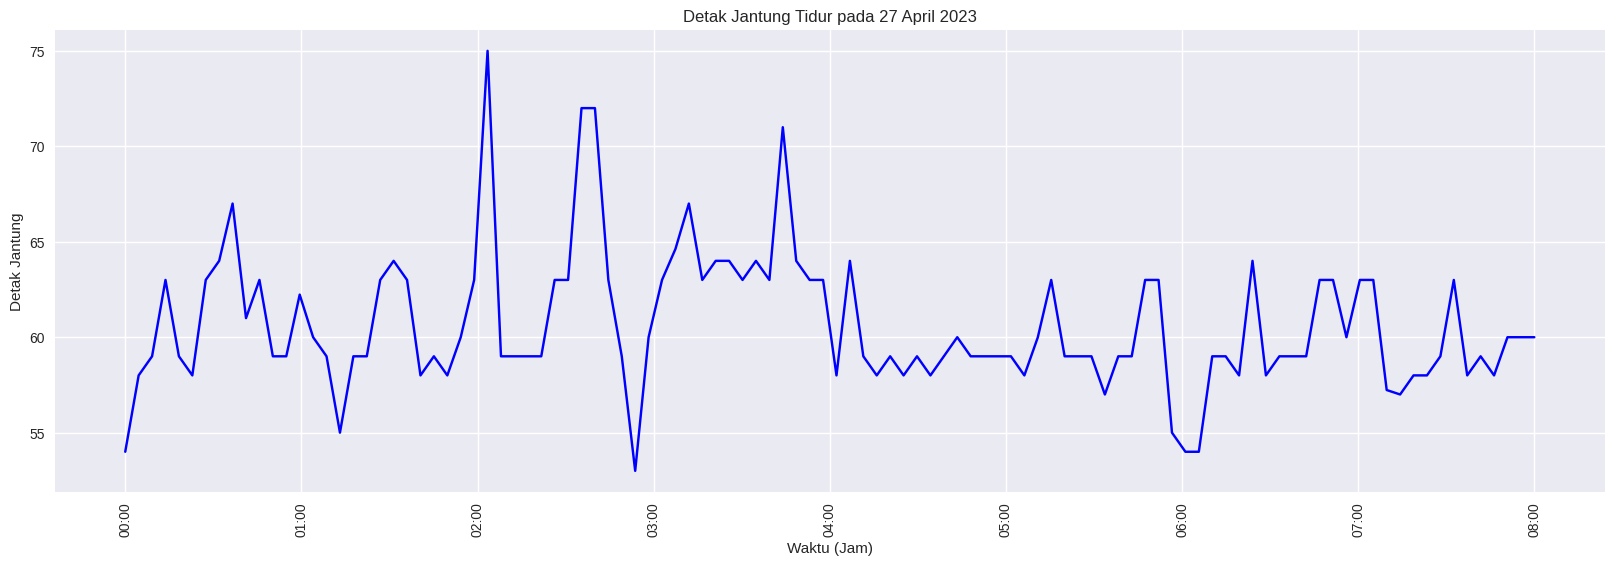

In [374]:
# Filter data
date_to_plot = pd.to_datetime('2023-04-27')
date_data = filtered_heart_rate_data[filtered_heart_rate_data['Date'] == date_to_plot]

# Mengabaikan FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the figure size and style
plt.figure(figsize=(20, 6))
plt.style.use('seaborn')

# Generate the x-axis values (hourly interval)
hourly_interval = np.arange(len(date_data))

# Plot heart rate against time
plt.plot(hourly_interval, date_data['Heart Rate'], color='b')

# Set the title and axis labels
plt.title(f"Detak Jantung Tidur pada {date_to_plot.strftime('%d %B %Y')}")
plt.xlabel('Waktu (Jam)')
plt.ylabel('Detak Jantung')

# Generate x-tick positions and labels based on specific hours
hours = date_data['Time'].apply(lambda x: x.hour)  # Extract hour from the time column
unique_hours = hours.unique()  # Get unique hours
num_ticks = len(unique_hours)  # Number of desired x-ticks
x_ticks = np.linspace(hourly_interval.min(), hourly_interval.max(), num_ticks)  # Generate evenly spaced tick positions
x_labels = [f'{hour:02d}:00' for hour in unique_hours]  # Format hour as "HH:00"

# Set the x-tick positions and labels
plt.xticks(x_ticks, x_labels, rotation='vertical')

# Hide MatplotlibDeprecationWarning
plt.rcParams.update({'axes.spines.top': False, 'axes.spines.right': False})

# Show the plot
plt.show()

# Mengembalikan pengaturan warning ke pengaturan aslinya
warnings.resetwarnings()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-375-dc5b1cf2e416>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  date_data = filtered_heart_rate_data[filtered_heart_rate_data['Date'] == date_to_plot]
<ipython-input-375-dc5b1cf2e416>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

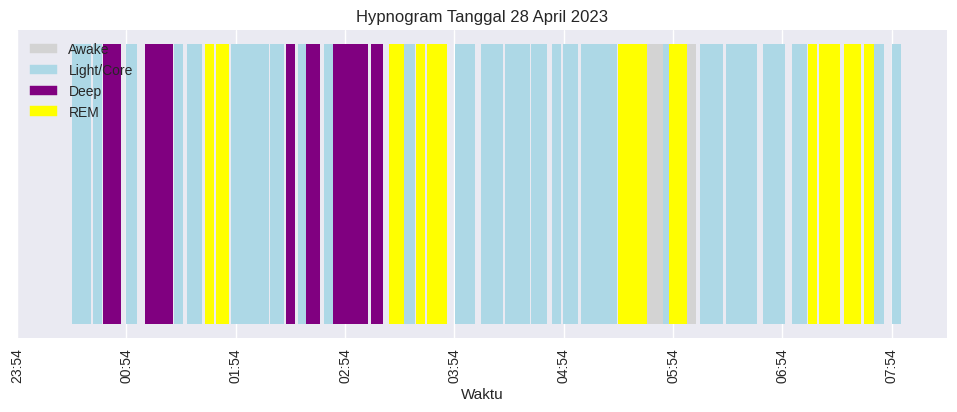

In [375]:
# Filter data
date_to_plot = pd.to_datetime('2023-04-28')
date_data = filtered_heart_rate_data[filtered_heart_rate_data['Date'] == date_to_plot]

# Convert the "Time" column to datetime by combining it with the date
date_data['Time'] = pd.to_datetime(date_data['Date'].astype(str) + ' ' + date_data['Time'].astype(str))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Define the sleep stage colors
stage_colors = {'Awake': 'lightgray', 'Light/Core': 'lightblue', 'Deep': 'purple', 'REM': 'yellow'}

# Plot the sleep stages and create legend patches
legend_patches = []
for index, row in date_data.iterrows():
    stage_start = row['Time']
    stage_end = stage_start + pd.Timedelta(minutes=5)
    category = row['Category']
    ax.barh(0, stage_end - stage_start, left=stage_start, color=stage_colors[category])

    # Add the category color as a legend patch
    legend_patch = mpatches.Patch(color=stage_colors[category])
    if legend_patch not in legend_patches:
        legend_patches.append(legend_patch)

# Set the plot title and axis labels
ax.set_title(f"Hypnogram Tanggal {date_to_plot.strftime('%d %B %Y')}")
ax.set_xlabel('Waktu')
ax.set_yticks([])  # Hide the y-axis ticks

# Set the x-axis limits
start_time = date_data['Time'].min() - pd.Timedelta(minutes=30)
end_time = date_data['Time'].max() + pd.Timedelta(minutes=30)
ax.set_xlim(start_time, end_time)

# Generate x-tick positions and labels based on the duration
duration = end_time - start_time
num_ticks = int(duration.total_seconds() / 60 / 60)  # Number of desired x-ticks (per hour)
x_ticks = pd.date_range(start_time, end_time, freq='H')  # Generate hourly tick positions
x_labels = [f'{tick.strftime("%H:%M")}' for tick in x_ticks]  # Format x-tick labels as "HH:MM"

# Set the x-tick positions and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation='vertical')

legend_patches = []
for stage, color in stage_colors.items():
    patch = mpatches.Patch(color=color, label=stage)
    legend_patches.append(patch)

# Add legend based on color patches
ax.legend(handles=legend_patches)

# Show the plot
plt.show()

In [376]:
# Load the filtered heart rate data
filtered_heart_rate_data_clf = filtered_heart_rate_data.copy()

# Convert 'Date' column to string representation
filtered_heart_rate_data_clf['Date'] = filtered_heart_rate_data_clf['Date'].astype(str)

# Encode categorical columns to numerical representation
encoder = LabelEncoder()
filtered_heart_rate_data_clf['Date'] = encoder.fit_transform(filtered_heart_rate_data_clf['Date'])
filtered_heart_rate_data_clf['Time'] = encoder.fit_transform(filtered_heart_rate_data_clf['Time'])

# Split the data into features (X) and target variable (y)
X = filtered_heart_rate_data_clf.drop('Category', axis=1)
y = filtered_heart_rate_data_clf['Category']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the sleep stages for the test set
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [377]:
# Create a DataFrame with date, time, heart rate, predicted, actual, and match values
results = pd.DataFrame({'Date': X_test['Date'],
                        'Time': X_test['Time'],
                        'Heart Rate': X_test['Heart Rate'],
                        'Predicted': y_pred,
                        'Actual': y_test})

# Add a column indicating whether the predicted and actual values match
results['Match'] = results['Predicted'] == results['Actual']

# Print several rows of the DataFrame
print("Predicted vs Actual:")
print(results.head(10))
# Calculate the accuracy of the model
accuracy = (accuracy_score(y_test, y_pred) * 100).round(2)
print("Accuracy:", accuracy)

Predicted vs Actual:
        Date   Time  Heart Rate   Predicted      Actual  Match
38390    106   5192        64.0  Light/Core  Light/Core   True
28703     80  10692        60.0  Light/Core         REM  False
91773    218   2800        58.0  Light/Core  Light/Core   True
69573    187   3272        67.0  Light/Core  Light/Core   True
52288    145  10048        62.0  Light/Core  Light/Core   True
41908    116  12440        64.0  Light/Core  Light/Core   True
106552   238   1182        55.0  Light/Core  Light/Core   True
13812     40   6171        68.0  Light/Core  Light/Core   True
13605     39  14984        68.0  Light/Core  Light/Core   True
85654    211   9140        61.0  Light/Core  Light/Core   True
Accuracy: 65.64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [378]:
# Initialize an empty DataFrame to store sleep quality data per day
sleep_quality_data = []

# Loop through each unique date in the filtered sleep data
for date in filtered_sleep_data['Start Time'].dt.date.unique():
    # Filter sleep data for the current date
    sleep_data_date = filtered_sleep_data.loc[filtered_sleep_data['Start Time'].dt.date == date].copy()
    
    # Calculate sleep duration for the current date
    sleep_data_date['Sleep Duration'] = sleep_data_date['End Time'] - sleep_data_date['Start Time']
    
    # Calculate total sleep duration for the current date
    total_sleep_duration = sleep_data_date['Sleep Duration'].sum().total_seconds() / 3600  # Convert to hours
    
    # Calculate awake duration for the current date
    awake_duration = sleep_data_date.loc[sleep_data_date['Category'] == 'Awake', 'Sleep Duration'].sum().total_seconds() / 3600
    
    # Calculate actual sleep duration for the current date
    actual_sleep_duration = total_sleep_duration - awake_duration
    
    # Calculate total sleep cycles for the current date
    total_cycles = 0
    cycle_started = False
    current_cycle = []

    # Iterate through each row in the sleep data for the current date
    for index, row in sleep_data_date.iterrows():
        category = row['Category']
        
        # Check if the current category is 'Light/Core' and the cycle has not started
        if category == 'Light/Core' and not cycle_started:
            cycle_started = True
            current_cycle.append(category)
        
        # Check if the current category is 'Deep' or 'REM' and the cycle has started
        elif category in ['Deep', 'REM'] and cycle_started:
            current_cycle.append(category)
            
            # Check if the current cycle contains 3 components
            if len(current_cycle) == 3:
                # Increase the total cycles count
                total_cycles += 1
                current_cycle = []
        
        # Check if the current category is 'Awake' and the cycle has started
        elif category == 'Awake' and cycle_started:
            # Reset the current cycle
            current_cycle = []
            cycle_started = False

    # Print the total sleep cycles
    
    # Append the sleep quality data to the sleep_quality_data list
    sleep_quality_data.append({
        'Date': date,
        'Total Sleep Duration': total_sleep_duration,
        'Actual Sleep Duration': actual_sleep_duration,
        'Total Sleep Cycles': total_cycles
    })

# Create the sleep_quality_data DataFrame from the list
sleep_quality_data = pd.DataFrame(sleep_quality_data)

# Calculate sleep efficiency for each day
sleep_quality_data['Sleep Efficiency'] = ((sleep_quality_data['Actual Sleep Duration'] / sleep_quality_data['Total Sleep Duration']) * 100).round(2)

# Convert the "Total Sleep Duration" column to timedelta format
sleep_quality_data['Total Sleep Duration'] = pd.to_timedelta(sleep_quality_data['Total Sleep Duration'], unit='hours')

# Convert the "Actual Sleep Duration" column to timedelta format
sleep_quality_data['Actual Sleep Duration'] = pd.to_timedelta(sleep_quality_data['Actual Sleep Duration'], unit='hours')

# Set the "Date" column as the index
sleep_quality_data.set_index('Date', inplace=True)
# Convert the timedelta columns to string format with format HH:MM
sleep_quality_data['Total Sleep Duration'] = sleep_quality_data['Total Sleep Duration'].apply(lambda x: str(x).split()[-1])
sleep_quality_data['Actual Sleep Duration'] = sleep_quality_data['Actual Sleep Duration'].apply(lambda x: str(x).split()[-1])
# Print the updated sleep quality data
print(sleep_quality_data)

# Calculate average sleep efficiency
overall_sleep_efficiency = sleep_quality_data['Sleep Efficiency'].mean()

# Print the average sleep efficiency
print("Overall Sleep Efficiency:", overall_sleep_efficiency)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           Total Sleep Duration Actual Sleep Duration  Total Sleep Cycles  \
Date                                                                        
2022-09-13   06:16:59.999998800    06:07:00.000001200                   2   
2022-09-14             07:25:30    07:12:29.999998800                   3   
2022-09-15   06:59:30.000001200    06:52:00.000001200                   1   
2022-09-16             07:43:30    07:26:30.000001200                   3   
2022-09-17   07:02:30.000001200    06:53:30.000001200                   2   
...                         ...                   ...                 ...   
2023-05-10             08:06:00              07:54:00                   3   
2023-05-11   07:04:59.999998800    06:31:59.999998799                   1   
2023-05-12   07:29:30.000001200    07:22:00.000001200                   2   
2023-05-13   07:44:30.000001200    07:36:29.999998800                   2   
2023-05-14   07:39:29.999998800    07:37:00.000001200                   4   

In [379]:
# Defining the fuzzy sets for each parameter
# Sleep Duration
duration = np.arange(0, 13)
short_duration = fuzz.trimf(duration, [0, 0, 5])
optimal_duration = fuzz.trimf(duration, [4, 7, 10])
long_duration = fuzz.trimf(duration, [8, 12, 12])

# Sleep Efficiency
efficiency = np.arange(0, 101)
low_efficiency = fuzz.trimf(efficiency, [0, 0, 40])
medium_efficiency = fuzz.trimf(efficiency, [30, 60, 90])
high_efficiency = fuzz.trimf(efficiency, [80, 100, 100])

# Total Sleep Cycles
cycles = np.arange(0, 11)
few_cycles = fuzz.trimf(cycles, [0, 0, 4])
average_cycles = fuzz.trimf(cycles, [3, 5, 7])
many_cycles = fuzz.trimf(cycles, [6, 10, 10])

# Defining the fuzzy rules
rules = [
    {'input': ['short_duration', 'low_efficiency', 'few_cycles'], 'output': 'low_quality'},
    {'input': ['short_duration', 'low_efficiency', 'average_cycles'], 'output': 'low_quality'},
    {'input': ['short_duration', 'low_efficiency', 'many_cycles'], 'output': 'low_quality'},
    {'input': ['short_duration', 'medium_efficiency', 'few_cycles'], 'output': 'low_quality'},
    {'input': ['short_duration', 'medium_efficiency', 'average_cycles'], 'output': 'medium_quality'},
    {'input': ['short_duration', 'medium_efficiency', 'many_cycles'], 'output': 'low_quality'},
    {'input': ['short_duration', 'high_efficiency', 'few_cycles'], 'output': 'medium_quality'},
    {'input': ['short_duration', 'high_efficiency', 'average_cycles'], 'output': 'high_quality'},
    {'input': ['short_duration', 'high_efficiency', 'many_cycles'], 'output': 'low_quality'},
    {'input': ['optimal_duration', 'low_efficiency', 'few_cycles'], 'output': 'low_quality'},
    {'input': ['optimal_duration', 'low_efficiency', 'average_cycles'], 'output': 'low_quality'},
    {'input': ['optimal_duration', 'low_efficiency', 'many_cycles'], 'output': 'low_quality'},
    {'input': ['optimal_duration', 'medium_efficiency', 'few_cycles'], 'output': 'medium_quality'},
    {'input': ['optimal_duration', 'medium_efficiency', 'average_cycles'], 'output': 'medium_quality'},
    {'input': ['optimal_duration', 'medium_efficiency', 'many_cycles'], 'output': 'medium_quality'},
    {'input': ['optimal_duration', 'high_efficiency', 'few_cycles'], 'output': 'medium_quality'},
    {'input': ['optimal_duration', 'high_efficiency', 'average_cycles'], 'output': 'high_quality'},
    {'input': ['optimal_duration', 'high_efficiency', 'many_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'low_efficiency', 'few_cycles'], 'output': 'medium_quality'},
    {'input': ['long_duration', 'low_efficiency', 'average_cycles'], 'output': 'medium_quality'},
    {'input': ['long_duration', 'low_efficiency', 'many_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'medium_efficiency', 'few_cycles'], 'output': 'medium_quality'},
    {'input': ['long_duration', 'medium_efficiency', 'average_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'medium_efficiency', 'many_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'high_efficiency', 'few_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'high_efficiency', 'average_cycles'], 'output': 'high_quality'},
    {'input': ['long_duration', 'high_efficiency', 'many_cycles'], 'output': 'high_quality'}
]
# Fuzzy inference function
def fuzzy_inference(duration_input, efficiency_input, cycles_input):
    # Fuzzify the input parameters
    duration_level = fuzz.interp_membership(duration, short_duration, duration_input)
    efficiency_level = fuzz.interp_membership(efficiency, low_efficiency, efficiency_input)
    cycles_level = fuzz.interp_membership(cycles, few_cycles, cycles_input)
    
    # Initialize the output strengths for each fuzzy set
    output_strengths = {
        'low_quality': np.zeros_like(duration),
        'medium_quality': np.zeros_like(duration),
        'high_quality': np.zeros_like(duration)
    }
    
    # Perform fuzzy inference for each rule
    for rule in rules:
        inputs = rule['input']
        output = rule['output']
        
        # Get the membership values for the input fuzzy sets
        input_strengths = [
            fuzz.interp_membership(duration, globals()[inputs[0]], duration_input),
            fuzz.interp_membership(efficiency, globals()[inputs[1]], efficiency_input),
            fuzz.interp_membership(cycles, globals()[inputs[2]], cycles_input)
        ]
        
        # Calculate the minimum input strength
        min_input_strength = np.min(input_strengths, axis=0)
        
        # Calculate the output strength
        output_strength = min_input_strength
        
        # Update the output strengths
        output_strengths[output] = np.maximum(output_strengths[output], output_strength)
    
    # Get the overall strengths for each output fuzzy set
    overall_strengths = {}
    for output, strengths in output_strengths.items():
        overall_strengths[output] = max(strengths)
    
    return overall_strengths

# Loop through the data and perform fuzzy inference for each row
for index, row in sleep_quality_data.iterrows():
    duration_input = pd.to_timedelta(row['Total Sleep Duration']).seconds / 3600  # Convert to hours
    efficiency_input = row['Sleep Efficiency']
    cycles_input = row['Total Sleep Cycles']
    
    # Perform fuzzy inference
    inference_result = fuzzy_inference(duration_input, efficiency_input, cycles_input)
    
    # Find the sleep quality with the highest strength
    sleep_quality = max(inference_result, key=inference_result.get)
    
    # Update the 'Sleep Quality' column in the DataFrame
    sleep_quality_data.loc[index, 'Sleep Quality'] = sleep_quality

# Print the updated sleep quality data
print(sleep_quality_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           Total Sleep Duration Actual Sleep Duration  Total Sleep Cycles  \
Date                                                                        
2022-09-13   06:16:59.999998800    06:07:00.000001200                   2   
2022-09-14             07:25:30    07:12:29.999998800                   3   
2022-09-15   06:59:30.000001200    06:52:00.000001200                   1   
2022-09-16             07:43:30    07:26:30.000001200                   3   
2022-09-17   07:02:30.000001200    06:53:30.000001200                   2   
...                         ...                   ...                 ...   
2023-05-10             08:06:00              07:54:00                   3   
2023-05-11   07:04:59.999998800    06:31:59.999998799                   1   
2023-05-12   07:29:30.000001200    07:22:00.000001200                   2   
2023-05-13   07:44:30.000001200    07:36:29.999998800                   2   
2023-05-14   07:39:29.999998800    07:37:00.000001200                   4   

In [380]:
# Export the DataFrame to an Excel file
sleep_quality_data.to_excel('sleep_quality_data.xlsx', index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
